In [0]:
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

data = pd.read_csv('https://raw.githubusercontent.com/siddupatil10/ML-mini-project/master/Mall_Customers.csv')
print(data.shape)
data.head()

(200, 5)


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


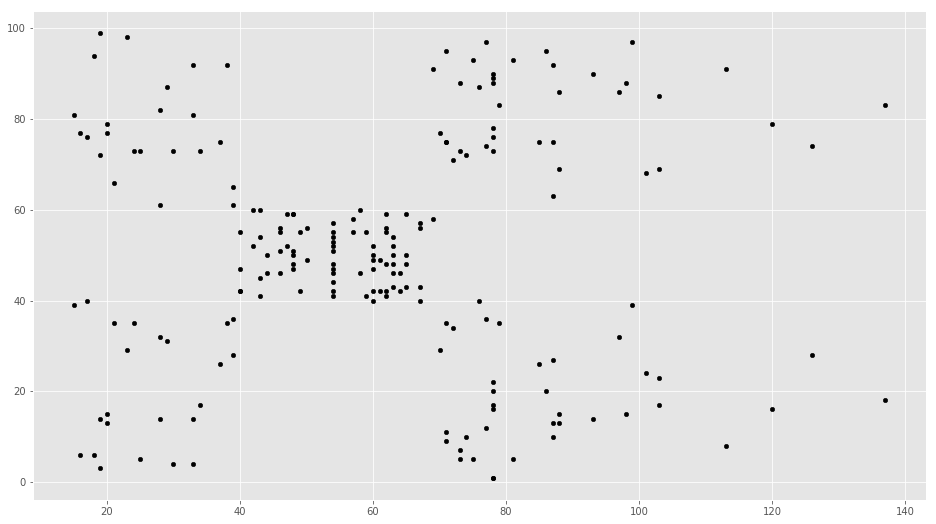

In [3]:
f1 = data['Annual Income (k$)'].values
f2 = data['Spending Score (1-100)'].values
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='black', s=20)

In [0]:
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [5]:
k = 6
# X coordinates of random centroids
C_x = np.random.randint(0, np.max(X)-20, size=k)
# Y coordinates of random centroids
C_y = np.random.randint(0, np.max(X)-20, size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print(C)


[[ 80.  74.]
 [ 11. 105.]
 [100.  93.]
 [ 78.  17.]
 [ 66.  33.]
 [  7.  44.]]


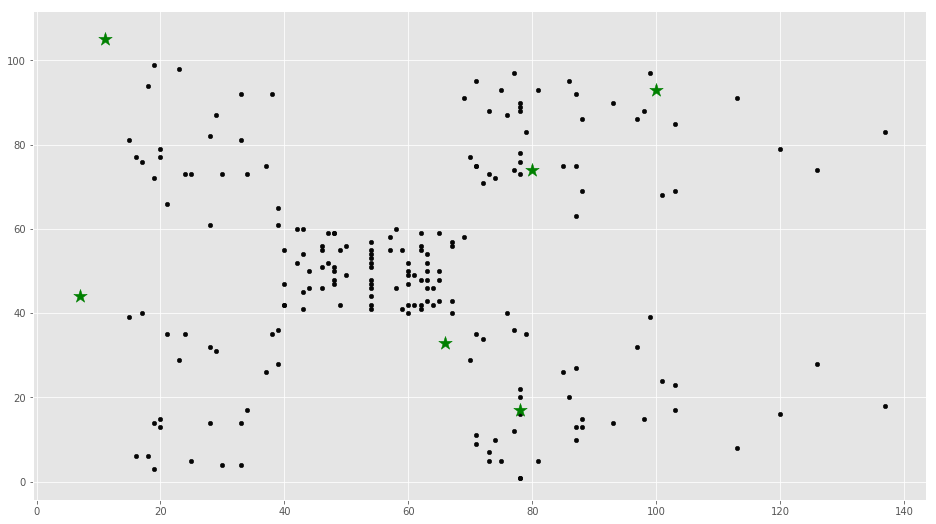

In [6]:
plt.scatter(f1, f2, c='#050505', s=20)
plt.scatter(C_x, C_y, marker='*', s=200, c='g')


In [0]:
# To store the value of centroids when it updates
C_old = np.zeros(C.shape)
# Cluster Lables(0, 1, 2)
clusters = np.zeros(len(X))
# Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)

In [0]:
# Loop will run till the error becomes zero
while error != 0:
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Storing the old centroid values
    C_old = deepcopy(C)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)

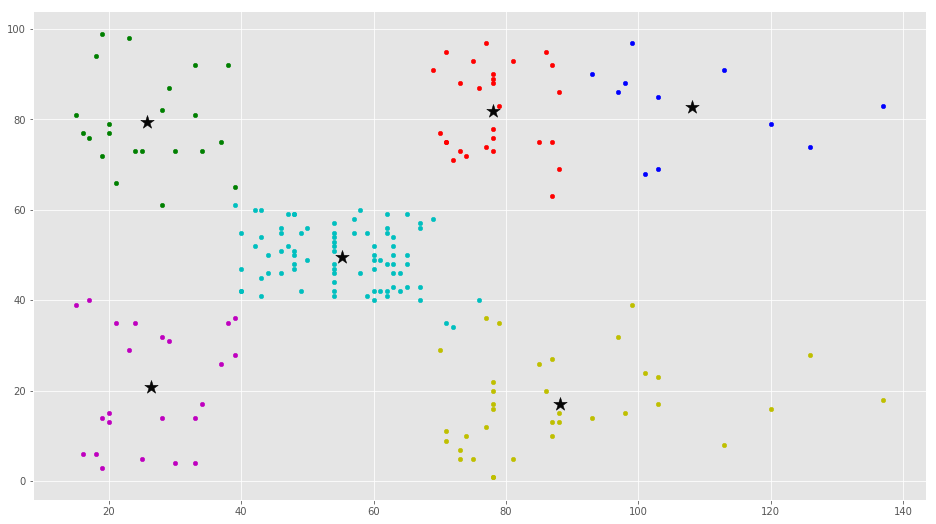

In [9]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=20, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')